DSCI 100 Group Project: Group 45 Individual work by Joshua An

Part 1: Data description
This analysis focuses on understanding which kinds of players are most likely to contribute a large amount of data, in order to optimize recruitment efforts.


The dataset selected is players.csv, as it contains relevant information about player characteristics.

In [68]:
#library importing
library(repr)
library(tidyverse)
library(tidymodels)

In [69]:
#reading of dataset- not in tidy form
dataset_url <- "https://raw.githubusercontent.com/Zitong06/DSCI100-Group-Project-005-45/refs/heads/main/players.csv"
players <- read_csv(dataset_url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


First, the number of columns and rows of the dataset was calculated. Each row belongs to an individual player, and each column a different variable.

In [70]:
num_rows <- nrow(players)
num_cols <- ncol(players)

num_rows
num_cols

[1] 196

[1] 7

So, the data was collected from a total of 196 players. Also, 7 columns/variables observed.

column #1: previous experience ranging from beginner to pro. Categorical variable

column #2: Whether a player subscribed to the newsletter or not. Categorical variable

column #3: A coded email of the player. Qualitative variable

column #4: Total play hours of each player. Numerical variable

column #5: Name of the player. Qualitative variable

column #6: Gender of the player. Categorical variable

column #7: Age of the player. Numerical variable

Now, summary statistics were calculated:

In [78]:
numerical_summary <- summary(select(players, where(is.numeric)))
numerical_summary

  played_hours          Age       
 Min.   :  0.000   Min.   : 8.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :20.52  
 3rd Qu.:  0.600   3rd Qu.:22.00  
 Max.   :223.100   Max.   :50.00  
                   NA's   :2      

In [79]:
categorical_summary <- players |>
    select(where(is.character)) |>
    summarise_all(n_distinct)
categorical_summary

experience,hashedEmail,name,gender
<int>,<int>,<int>,<int>
5,196,196,7


However, the categorical variables are a issue in analysis- as the name and hashedEmail variable do not provide relevant information to the exploratory data analysis question. So, for the purposes of this report, the data will be further wrangled so that such variables are filtered.

Additionally, the Age variable was seen to have missing values- which need to be filled for a tidy data.

Part 2: Question

Again, the broad question of interest was finding what "kinds" of players are likely to contribute to a large part amount of data.
From this, a specific question was formulated- can player age predict the amount of hours they spend playing, contributing to the dataset?

So, therefore:

response variable = played_hours

explanatory variable = age

The initial hypothesis is that younger players are more likely to contribute more greatly to the dataset compared to older players, due to the difference in amount of leisure time. Therefore, younger players should be targetted in recruitment efforts

Part 3: Exploratory Data Analysis and Visualization

The dataset was already loaded along with the calculation of summary statistics for each variable in part 1. So, Data was minimally wrangled into a tidy format first below. 

In [73]:
#1: The missing age variable values were filled using the median values of age.
clean_players1 <- players |>
  mutate(Age = ifelse(is.na(Age), median(Age, na.rm = TRUE), Age))

#2: Columns not required for the purposes of the questions were removed
clean_players_final <- clean_players1 |>
  select(-hashedEmail, -name)

clean_players_final

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


Now, means of numerical variables:

In [74]:
means <- clean_players_final |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE))

means

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.5051


Below are the explatory visualizations of the numerical variables.

First, a histogram of age to determine the overall spread/demographic of player age was plotted.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


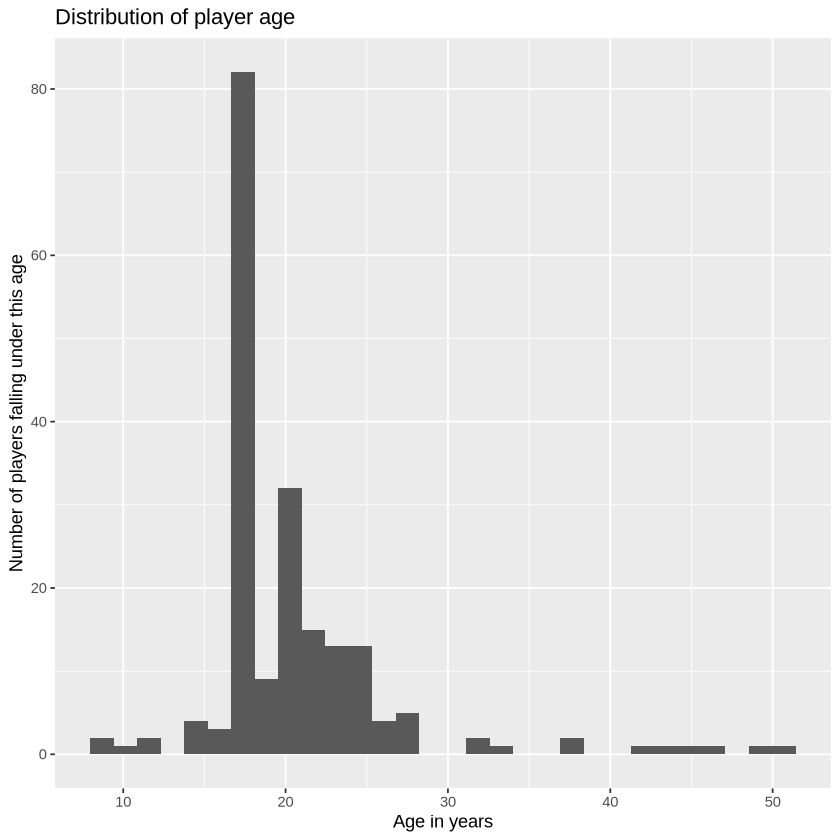

In [75]:
hist_age <- clean_players_final |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(title = "Distribution of player age", x = "Age in years", y = "Number of players falling under this age")
hist_age

Majority of the players fall between the ages of 15~20, meaning younger players are likely to participate in contributing to the dataset compared to older players as hypothesized.

Now, a histogram of total played hours were plotted to visualize the spread of how long players spent contributing to the dataset.

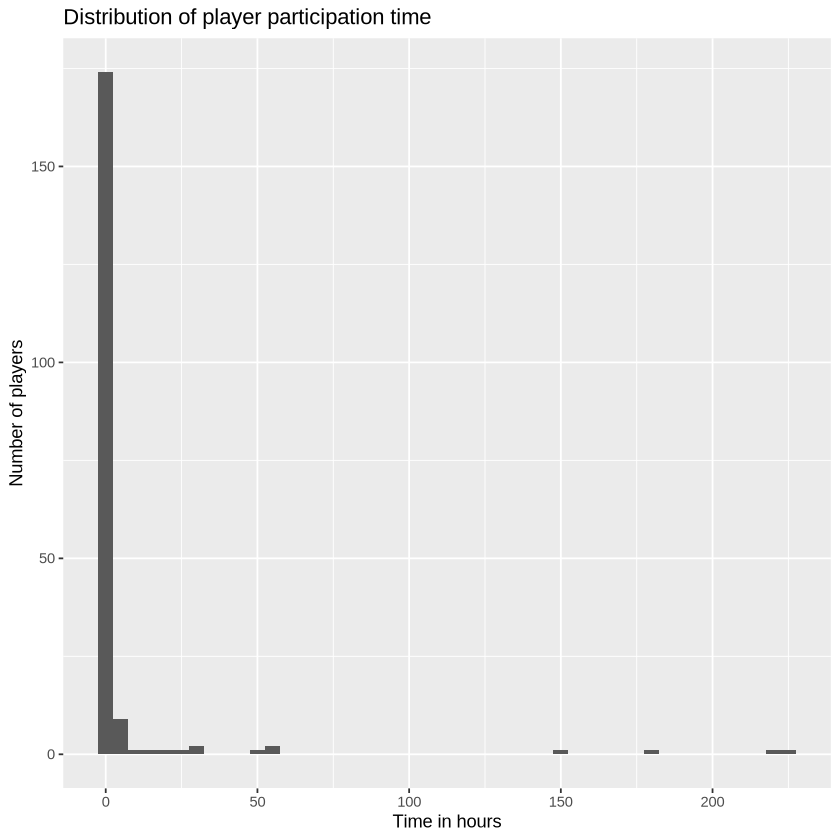

In [76]:
hist_hours <- clean_players_final |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 5) +
    labs(title = "Distribution of player participation time", x = "Time in hours", y = "Number of players")
hist_hours

The histogram shows a heavy left skew, due to some players contributing to a total of 0 playtime. These players will need to be filtered out of the dataset for accurate representation of the data.

Lastly, a scatterplot was plotted between the total played hours as the response variable, and the age as the explanatory variable.

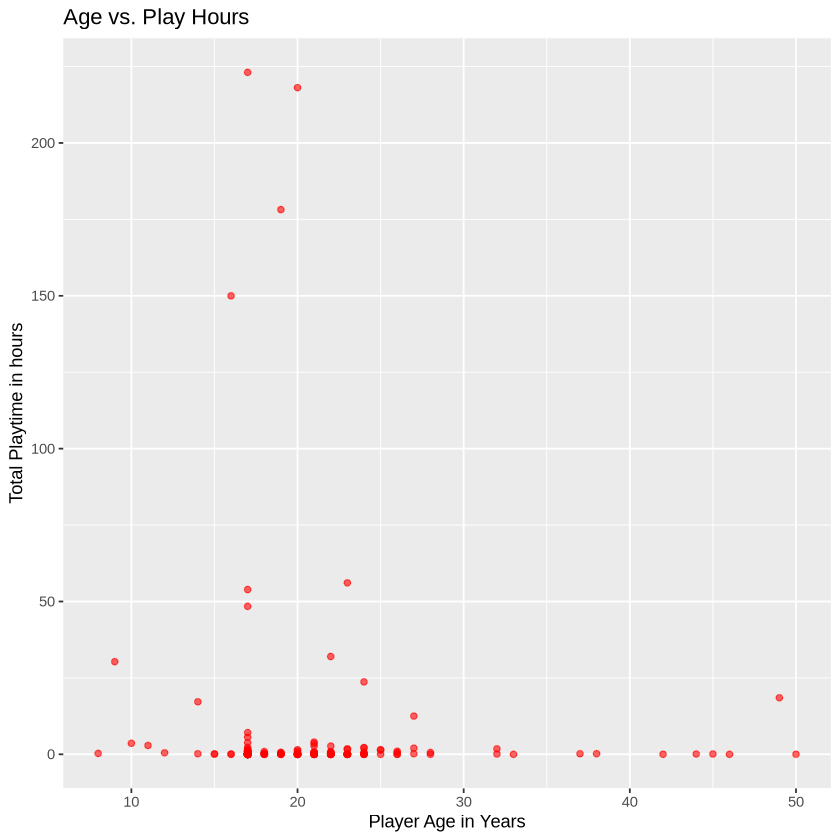

In [77]:
hour_age_plot <- clean_players_final |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.6, color = "red") +
    labs(title = "Age vs. Play Hours", x = "Player Age in Years", y = "Total Playtime in hours") 
hour_age_plot

The same issue as the histogram of the total playtime is observed, as majority of the dataset returns a low playtime near zero- meaning the data must be wrangled further for any more analysis. 

However, based on this plot, we see that younger players do indeed show greater participation both in numbers and total played hours as hypothesized regardless of the unwrangled data.

Part 4: Methods and Plan

Chosen method: linear regression. Appropariate as the response variable is continuous

Required assumptions: two variables have a linear relationship, and each observation is independent

potential limitations: Outliers can impact the results, and the spread of age could limit the results

How model will be compared/selected: Alternate models besides linear regression could be used to test

How data will be processed for the model: two splits, into training + testing. Splitting to take place before model training, no validation to be used.